## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [213]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [214]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [215]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [217]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [209]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [221]:
# number of times treatment and new pages dont match
treat_nomatch = df.query('group == "treatment" and landing_page != "new_page"').count()

In [211]:
# number of times control and old page dont match
control_nomatch = df.query('group == "control" and landing_page != "old_page"').count()

In [222]:
treat_nomatch + control_nomatch 

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

In [ ]:
df.info()

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [237]:
df_treat = df.query('group == "treatment" and landing_page == "new_page"')
df_control = df.query('group == "control" and landing_page == "old_page"')
df2 = df_treat.merge(df_control, how = 'outer')
df2.shape

(290585, 5)

In [229]:
df_treat

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1
...,...,...,...,...,...
294462,677163,2017-01-03 19:41:51.902148,treatment,new_page,0
294465,925675,2017-01-07 20:38:26.346410,treatment,new_page,0
294468,643562,2017-01-02 19:20:05.460595,treatment,new_page,0
294472,822004,2017-01-04 03:36:46.071379,treatment,new_page,0


In [227]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [230]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

b. There is one **user_id** repeated in **df2**.  What is it?

In [225]:
df2.user_id.value_counts()

773192    2
630732    1
811737    1
797392    1
795345    1
         ..
650647    1
648598    1
654741    1
652692    1
630836    1
Name: user_id, Length: 290584, dtype: int64

**The unique User ID is 773192.**

c. What is the row information for the repeat **user_id**? 

In [238]:
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
938,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [242]:
df2.drop(index=1404, inplace=True)
df2['user_id'].value_counts()

630732    1
793302    1
840399    1
797392    1
795345    1
         ..
650647    1
648598    1
654741    1
652692    1
630836    1
Name: user_id, Length: 290584, dtype: int64

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [243]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [244]:
df2.groupby(['group'], as_index=False)['converted'].mean()

,group,converted
0,control,0.120386
1,treatment,0.118808


c. Given that an individual was in the `treatment` group, what is the probability they converted?

See above ^

d. What is the probability that an individual received the new page?

In [245]:
df2_newpage = df2.query('landing_page == "new_page"')
len(df2_newpage)/len(df2)

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**There is a ~50% chance of an individual receiving the new page however, the conversion rate for that group is ~11.9%, compared to the ~12% conversion rate of the individuals that received the old page.Based on the mean conversions of each group, I would say that the evidence isn't sufficient to conclude whether or not the new page leads to more conversions, due to the 0.01% difference between them**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

### Hypotheses:
##### The Null hypothesis is the old page converts more or about the same amount of users as the new page  
-Null: P𝑜𝑙𝑑 >= P𝑛𝑒𝑤 

##### The alternative hypothesis is the new page converts more users than the old page
-Alternative: P𝑜𝑙𝑑 < P𝑛𝑒𝑤

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [ ]:
pnew = df2.converted.mean()
pnew

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [ ]:
pold = df2.converted.mean()
pold

c. What is $n_{new}$, the number of individuals in the treatment group?

In [253]:
nnew = df2.landing_page.value_counts()[0]
nnew

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [256]:
nold = df2.landing_page.value_counts()[1]
nold

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [257]:
new_page_converted = np.random.choice([1, 0], size=145310, p=[0.1195, 0.8805])
new_page_converted.mean()

0.11893193861399766

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [258]:
old_page_converted = np.random.choice([1, 0], size=145274, p=[0.1195, 0.8805])
old_page_converted.mean()

0.11838319313848314

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [259]:
diff = new_page_converted.mean() - old_page_converted.mean()
diff

0.0005487454755145199

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [260]:
p_diffs = []
size = df2.shape[0]
for _ in range(10000):
    b_sample = df2.sample(size, replace=True)
    new_page_converted_mean = b_sample.query('group == "treatment"').converted.mean()
    old_page_converted_mean = b_sample.query('group == "control"').converted.mean()
    p_diffs.append(new_page_converted_mean - old_page_converted_mean)

In [261]:
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

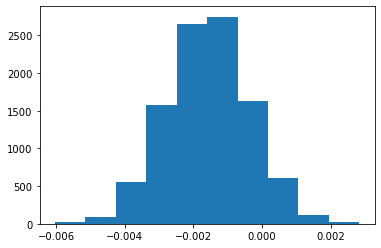

In [262]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [263]:
treat_converted = df2.query('group == "treatment"')['converted'].mean()
control_converted = df2.query('group == "control"')['converted'].mean()
actual_diff = treat_converted - control_converted
actual_diff

-0.0015782389853555567

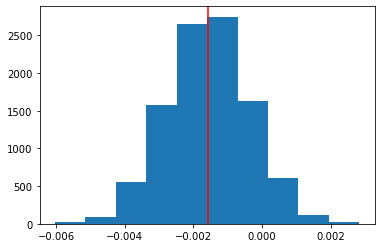

In [264]:
#plotting hist for actual_diffs
plt.hist(p_diffs);
plt.axvline(x=actual_diff, color='red');

In [265]:
#proportion of null vs actual values
(p_diffs > actual_diff).mean()

0.5039

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The p-value was computed in part j and it shows the proportion of null values (p_diffs) that are greater than the observed difference (actual_diffs) in page conversions. The p-value shows that we failed to reject the null hypothesis since 0.50 is greater than our error rate of 0.05.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [266]:
import statsmodels.api as sm

convert_old = len(df2.query('landing_page == "old_page" and converted == 1'))
convert_new = len(df2.query('landing_page == "new_page" and converted == 1'))
n_old = len(df2.query('landing_page == "new_page"'))
n_new = len(df2.query('landing_page == "old_page"'))

In [267]:
convert_new, convert_old

(17264, 17489)

In [268]:
n_new, n_old

(145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [269]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new],value=None, alternative='smaller', prop_var=False)

z_score, p_value

(1.2616957421858055, 0.8964708551967226)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The z-score and p-value computed above show that we fail to reject the null hypothesis. Since the p-value is 0.90, which is significantly higher than the 0.05 error rate, it means that cannot infer with a 95% CI, that the conversion rate of the new page is not greater than the conversion rate of the old page.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic regression should be used since the dependant variable is binary.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [270]:
df2[['control', 'treatment']] = pd.get_dummies(df2['group'])
df2 =df2.drop('control', axis = 1)
df2

,user_id,timestamp,group,landing_page,converted,treatment
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1
...,...,...,...,...,...,...
290580,718310,2017-01-21 22:44:20.378320,control,old_page,0,0
290581,751197,2017-01-03 22:28:38.630509,control,old_page,0,0
290582,945152,2017-01-12 00:51:57.078372,control,old_page,0,0
290583,734608,2017-01-22 11:45:03.439544,control,old_page,0,0


In [271]:
df3 = df2.rename(columns = {'treatment':'ab_page'})
df3

,user_id,timestamp,group,landing_page,converted,ab_page
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1
...,...,...,...,...,...,...
290580,718310,2017-01-21 22:44:20.378320,control,old_page,0,0
290581,751197,2017-01-03 22:28:38.630509,control,old_page,0,0
290582,945152,2017-01-12 00:51:57.078372,control,old_page,0,0
290583,734608,2017-01-22 11:45:03.439544,control,old_page,0,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [272]:
df3['intercept'] = 1

lm = sm.Logit(df3['converted'], df3[['intercept', 'ab_page']])
results = lm.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [273]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 26 Mar 2021   Pseudo R-squ.:               8.077e-06
Time:                        12:46:40   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [274]:
np.exp(-0.0150)

0.9851119396030626

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**The p-value associated with ab_page is 0.19. A reason for the difference between the p-values in Part II vs Part III might be due to the fact that in part II I used a one-sided hypothesis test but in part III, a two-sided test was used.


**The null hypothesis of my regression model is
       Null: New_conversion_rate = Old_conversion_rate 
       Alternative: New_conversion_rate != Old_conversion_rate**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**It is a good idea to consider other factors because they could provide a more accurate picture of which page is better given that they may contribute to the significance of the tests. A disadvantage to adding more terms is that the combination of all terms could lead to their impact being misinterpreted, in comparison to only looking at them individually. **

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [275]:
countries = pd.read_csv('countries.csv')
countries 

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK
...,...,...
290579,653118,US
290580,878226,UK
290581,799368,UK
290582,655535,CA


In [276]:
countries[['CA', 'UK']] = pd.get_dummies(countries['country'])[['CA','UK']]
countries

,user_id,country,CA,UK
0,834778,UK,0,1
1,928468,US,0,0
2,822059,UK,0,1
3,711597,UK,0,1
4,710616,UK,0,1
...,...,...,...,...
290579,653118,US,0,0
290580,878226,UK,0,1
290581,799368,UK,0,1
290582,655535,CA,1,0


In [277]:
df_new = countries.set_index('user_id').join(df3.set_index('user_id'), how='inner')
df_new.head()

,country,CA,UK,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,,,
834778,UK,0,1,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,0,0,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,0,1,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,0,1,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,UK,0,1,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [278]:
df_new=df_new.drop('country', axis=1)
df_new

,CA,UK,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,,
834778,0,1,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,0,0,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,0,1,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,0,1,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,0,1,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1
...,...,...,...,...,...,...,...,...
653118,0,0,2017-01-09 03:12:31.034796,control,old_page,0,0,1
878226,0,1,2017-01-05 15:02:50.334962,control,old_page,0,0,1
799368,0,1,2017-01-09 18:07:34.253935,control,old_page,0,0,1


In [279]:
df_new.query('CA == 1').converted.mean()

0.11531829781364232

In [280]:
df_new.query('UK == 1').converted.mean()

0.12059448568984076

> I don't think the countries made much of a difference in the conversion rates given that the rates are very similar to the previous observation.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [285]:
df_new['intercept'] = 1
df_new['CA_ab'] = df_new['CA'] * df_new['ab_page']
df_new['UK_ab'] = df_new['UK'] * df_new['ab_page']


lm = sm.Logit(df_new['converted'], df_new[['intercept', 'CA_ab', 'UK_ab']])
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 26 Mar 2021   Pseudo R-squ.:               2.364e-05
Time:                        12:53:14   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                   0.08085
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9963      0.006   -322.049      0.000      -2.008      -1.984
CA_ab         -0.0752      0.038     -1.997      0.046      -0.149      -0.001
UK_ab          0.0149      0.017      0.862      0.389      -0.019       0.049
==============================================================================
"""

In [289]:
np.exp(results.params)

intercept    0.135840
CA_ab        0.927579
UK_ab        1.015000
dtype: float64

> Conclusion: There is no correlation between country and conversion rates for the pages since the odds are about equal for converting users. Overall, I would advise the company to keep their old page layout since it converts users at basically the same rate as the new page.

Resources:
https://pandas.pydata.org/docs/ 